In [2]:
# NOTE: three main ideas that will be spoken here is
# 1) categorical correlation
# 2) pariplot
# 3) swarmplots and graph annotation

In [60]:
import pandas as pd
import numpy as np
from ratstat import Cramer
from dython.model_utils import associations

In [63]:
df = pd.read_csv('../dataset/fifa.csv', index_col=0, low_memory=False)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17,13,21,50,13,18,21,19,51,42,57,58,60,...,30,12,68,40,68,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [78]:
from matplotlib import pyplot as plt
import seaborn as sns

# Correlation

## Numerical

In [ ]:
# NOTE: we use pearson's correlation here

graph = sns.heatmap(
    df.corr(),
#     vmax=.3,
#     center=0,
    square=True,
    linewidths=.5,
    cbar_kws={'shrink': .5},
    annot=True,
    fmt='.2f',
    cmap='coolwarm')

# Remove the top and right spines from plot(s).
sns.despine()

graph.figure.set_size_inches(14, 10)

plt.show()

## Categorical

### Cramer

In [6]:
# https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
# https://en.wikipedia.org/wiki/Correlation_ratio
# https://en.wikipedia.org/wiki/P-value
# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
# http://www.stat.yale.edu/Courses/1997-98/101/chisq.htm

In [19]:
# NOTE: On here I am using self-made modules, to find cramer between columns
# NOTE: Later, you can apply this cramer to each columns then plot it with heatmap
c1 = Cramer(df,'Nationality', 'Club')
# NOTE: The former one is cramer, the later is chi2
print(c1.cramer)

(0.37901100707221386, 2469376.171152859)


## Numerical and Categorical

### Association

### Pair Plot

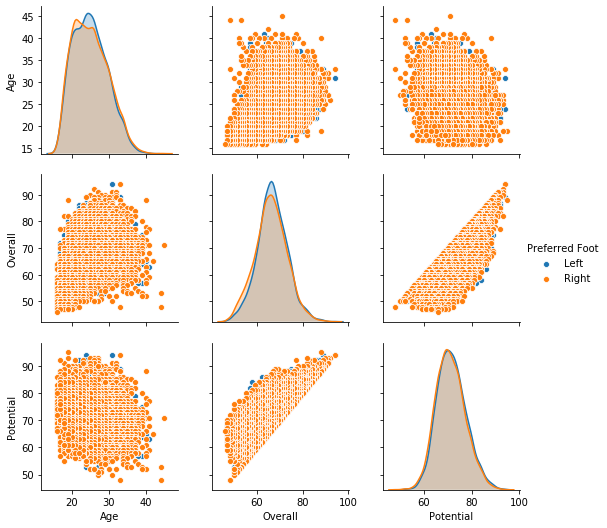

In [86]:
sns.pairplot(df[['Age', 'Overall', 'Potential', 'Preferred Foot']], hue='Preferred Foot')
plt.show()

### Swarm Plot

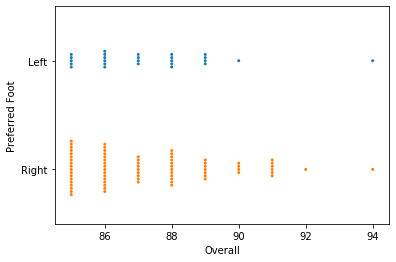

In [91]:
sns.swarmplot(y='Preferred Foot', x='Overall', data=df.head(100), size=3)

### Box Plot

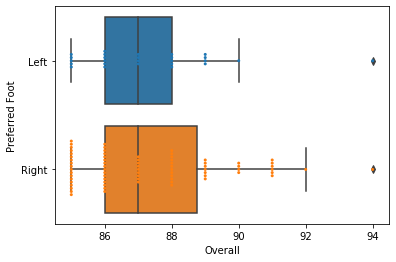

In [96]:
# NOTE: we can combine box and swarm plot
sns.boxplot(y='Preferred Foot', x='Overall', data=df.head(100))
sns.swarmplot(y='Preferred Foot', x='Overall', data=df.head(100), size=3)